In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras import backend as K
import numpy as np
from keras.preprocessing import image

49


In [ ]:
img_width,img_height=150,150
train_data_dir='/content/drive/MyDrive/eye_new/train'
validation_data_dir='/content/drive/MyDrive/eye_new/test'
nb_train_samples=5234
nb_validation_samples=218
epochs=50
batch_size=104
if K.image_data_format()=='channels_first':
  input_shape=(3,img_width,img_height)
else:
  input_shape=(img_width,img_height,3)
    

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator=train_datagen.flow_from_directory(train_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')

Found 5257 images belonging to 2 classes.


In [ ]:
validation_generator=test_datagen.flow_from_directory(validation_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')

Found 226 images belonging to 2 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:

model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:

model.add(Conv2D(64,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit_generator(train_generator,steps_per_epoch=nb_train_samples // batch_size,epochs=epochs,validation_data=validation_generator,validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
50/50 [==============================] - 3379s 67s/step - loss: 0.7602 - accuracy: 0.6127 - val_loss: 0.3136 - val_accuracy: 0.8798
Epoch 2/50
50/50 [==============================] - 41s 825ms/step - loss: 0.3268 - accuracy: 0.8772 - val_loss: 0.2710 - val_accuracy: 0.9279
Epoch 3/50
50/50 [==============================] - 41s 819ms/step - loss: 0.2188 - accuracy: 0.9336 - val_loss: 0.1887 - val_accuracy: 0.9231
Epoch 4/50
50/50 [==============================] - 42s 831ms/step - loss: 0.2043 - accuracy: 0.9289 - val_loss: 0.1403 - val_accuracy: 0.9471
Epoch 5/50
50/50 [==============================] - 41s 813ms/step - loss: 0.1344 - accuracy: 0.9556 - val_loss: 0.1336 - val_accuracy: 0.9615
Epoch 6/50
50/50 [==============================] - 40s 807ms/step - loss: 0.1204 - accuracy: 0.9595 - val_loss: 0.1595 - val_accuracy: 0.9471
Epoch 7/50
50/50 [==============================] - 40s 802ms/step - loss: 0.1040 - accuracy: 0.9695 - val_loss: 0.1974 - val_accuracy: 0.9375

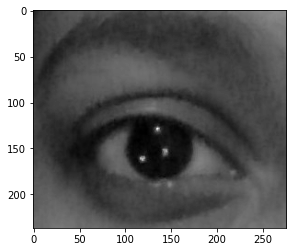

In [ ]:
import matplotlib.pyplot as plt
import cv2
img_pred=cv2.imread('/content/drive/MyDrive/eye_new/test/Open_Eyes/_163.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img_pred,cmap='gray')


In [ ]:
img_pred=image.load_img("/content/drive/MyDrive/eye_new/test/Open_Eyes/_163.jpg",target_size=(150,150))
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)
rslt=model.predict(img_pred)
print(rslt)

[[1.]]


In [ ]:

img_pred=image.load_img('/content/drive/MyDrive/eye_new/test/Closed_Eyes/_181.jpg',target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

In [ ]:
rslt=model.predict(img_pred)
print(rslt)

[[0.]]


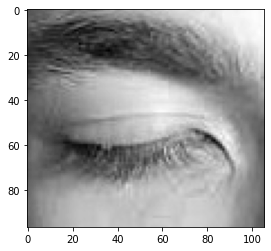

In [ ]:

img1=cv2.imread("/content/drive/MyDrive/eye_new/test/Closed_Eyes/_14.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(img1,cmap='gray')

In [ ]:

img_pred=image.load_img('/content/drive/MyDrive/eye_new/test/Closed_Eyes/_181.jpg',target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

In [ ]:
rslt=model.predict(img_pred)
print(rslt)

[[0.]]
